In [ ]:
import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
class CNN(nn.Module):
    def __init__(self, in_channels = 1, num_classes = 10):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size = (3,3), stride = (1,1), padding = (1,1))
        self.pool = nn.MaxPool2d(kernel_size = (2,2), stride = (2,2))
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = (3,3), stride = (1,1), padding = (1,1))
        self.fc1 = nn.Linear(16*7*7, num_classes)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc1(x)

        return x

In [ ]:
# Hyperparameters
in_channels = 1
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 40

In [ ]:
# Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
class dataset(Dataset):
  def __init__(self, images, labels):
    self.images = images
    self.labels = labels
  def __len__(self):
    return len(self.images)
  def __getitem__(self, index):
    image = self.images[index]
    label = self.labels[index]
    return image, label

In [ ]:
train_data = DataLoader(dataset(x_train, y_train),
               batch_size = batch_size,
               shuffle=True)

test_data = DataLoader(dataset(x_test, y_test),
               batch_size = batch_size,
               shuffle=True)

In [ ]:
model = CNN()
loss_criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
# Training

i = 0
for epoch in range(num_epochs):
    i += 1
    model.train()
    running_loss = 0.0

    for images, labels in train_data:
        images = images.unsqueeze(1).float()
        labels = labels.long()
        optimizer.zero_grad()
        output = model(images)
        loss = loss_criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss/len(train_data)
    print(i, " Epoch: ", (epoch+1)/(num_epochs), " Loss: ", epoch_loss)


1  Epoch:  0.025  Loss:  0.3539302574648365
2  Epoch:  0.05  Loss:  0.07930019512466753
3  Epoch:  0.075  Loss:  0.058756421129693336
4  Epoch:  0.1  Loss:  0.04903230045519735
5  Epoch:  0.125  Loss:  0.043451060027158116
6  Epoch:  0.15  Loss:  0.040420197545636895
7  Epoch:  0.175  Loss:  0.03720163739576191
8  Epoch:  0.2  Loss:  0.03340003634910197
9  Epoch:  0.225  Loss:  0.031127401820048497
10  Epoch:  0.25  Loss:  0.027714920248288217
11  Epoch:  0.275  Loss:  0.028423497788569948
12  Epoch:  0.3  Loss:  0.026104510606520116
13  Epoch:  0.325  Loss:  0.022319929665247967
14  Epoch:  0.35  Loss:  0.024119815194530894
15  Epoch:  0.375  Loss:  0.02202670895549614
16  Epoch:  0.4  Loss:  0.02081815414562291
17  Epoch:  0.425  Loss:  0.020315686159567997
18  Epoch:  0.45  Loss:  0.019066715643538765
19  Epoch:  0.475  Loss:  0.017712220020464894
20  Epoch:  0.5  Loss:  0.015093034253376863
21  Epoch:  0.525  Loss:  0.01865772118318543
22  Epoch:  0.55  Loss:  0.01939867967418589
2

In [ ]:
# Testing
model.eval()
correct = 0
total = 0
for images, labels in test_data:
  images = images.unsqueeze(1).float()
  labels = labels.long()
  output = model(images)
  loss = loss_criterion(output, labels)
  correct += (output.argmax(1) == labels).sum().item()
  total += labels.size(0)
print(100*correct/total)

98.41


In [ ]:
from google.colab import drive

In [ ]:
images = [torch.zeros(1,28,28) for _ in range(10)]
images[0] = Image.open("/content/drive/MyDrive/Colab Notebooks/WiDS Assignment 1/Digits/0.jpg")
images[1] = Image.open("/content/drive/MyDrive/Colab Notebooks/WiDS Assignment 1/Digits/1.jpg")
images[2] = Image.open("/content/drive/MyDrive/Colab Notebooks/WiDS Assignment 1/Digits/2.jpg")
images[3] = Image.open("/content/drive/MyDrive/Colab Notebooks/WiDS Assignment 1/Digits/3.jpg")
images[4] = Image.open("/content/drive/MyDrive/Colab Notebooks/WiDS Assignment 1/Digits/4.jpg")
images[5] = Image.open("/content/drive/MyDrive/Colab Notebooks/WiDS Assignment 1/Digits/5.jpg")
images[6] = Image.open("/content/drive/MyDrive/Colab Notebooks/WiDS Assignment 1/Digits/6.jpg")
images[7] = Image.open("/content/drive/MyDrive/Colab Notebooks/WiDS Assignment 1/Digits/7.jpg")
images[8] = Image.open("/content/drive/MyDrive/Colab Notebooks/WiDS Assignment 1/Digits/8.jpg")
images[9] = Image.open("/content/drive/MyDrive/Colab Notebooks/WiDS Assignment 1/Digits/9.jpg")

transform = transforms.Compose([
    transforms.Grayscale(1),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: 1-x),
    transforms.Normalize((0.1307,), (0.3081,))
])

for i in range(10):
    images[i] = transform(images[i])
    images[i] = images[i].view(1, 1, 28, 28)
    images[i] = (images[i] - images[i].min())/(images[i].max() - images[i].min()) * 255



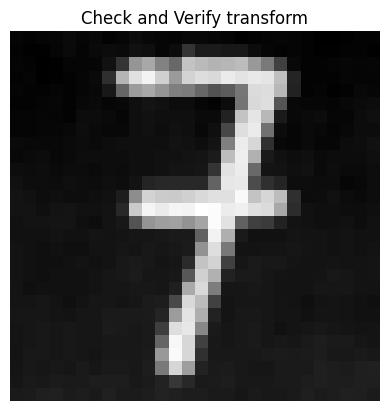

In [ ]:
plt.imshow(images[7].squeeze(), cmap="gray")
plt.title("Check and Verify transform")
plt.axis("off")
plt.show()

In [ ]:
for i in range(10):
    model.eval()

    with torch.no_grad():
        output = model(images[i])
        prediction = output.argmax(dim=1)

    print("Predicted digit:", prediction.item())

Predicted digit: 0
Predicted digit: 1
Predicted digit: 2
Predicted digit: 3
Predicted digit: 4
Predicted digit: 5
Predicted digit: 5
Predicted digit: 4
Predicted digit: 8
Predicted digit: 9
